# solving approach
## WOMEN  CLOTHING E-COMM REVIEWS
Describe the data
Descriptive statistics, data type, etc.
Analyze the text comment/ review and share the findings
Convert the ratings into 2 classes
Class: Bad when Rating <=3
Class: Good otherwise and required steps to be followed .

In [1]:
#Importing basic required libraries
import numpy as np
import pandas as pd
import nltk
import random
import os

In [2]:
#importing libraries for visualization purpose and for the analysis of text
import matplotlib as mpl
import matplotlib.pyplot as plot
import seaborn as se
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [3]:
#import warnings to be ignored 
import warnings
warnings.filterwarnings('ignore')

In [4]:
#read the dataframe to perform task
df = pd.read_csv(r'C:\Users\ACER\Desktop\Internship\Womens_Clothing_E_Commerce_Reviews.csv')

In [5]:
#looking the head of dataframe
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
#to get the no.of rows and columns
df.shape

(23486, 11)

In [8]:
#to get the data type of each column
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [9]:
#total no.of null values in the each column
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

We have some NULL values in the Title and Review Text columns.And few equal number of (14) NULL values in the DIVISION NAME ,DEPARTMENT NAME AND CLASS NAME 

Unnamed: 0                 False
Clothing ID                False
Age                        False
Title                       True
Review Text                 True
Rating                     False
Recommended IND            False
Positive Feedback Count    False
Division Name               True
Department Name             True
Class Name                  True
dtype: bool

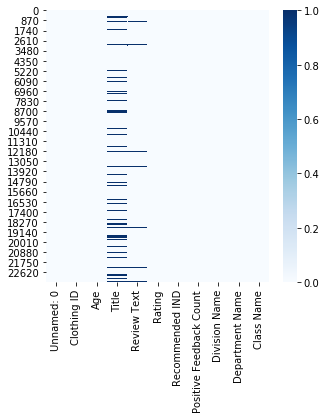

In [10]:
#ploting the null values in the dataset
plot.figure(figsize=(5,5))
se.heatmap(df.isnull(),cmap='Blues')
df.isnull().any()

In [11]:
#in the above we don't need the Unnamed: 0 so we are droping it
df=df.drop(['Unnamed: 0'],axis=1)

In [12]:
#after droping dataframe 
df.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [13]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


# DATA DESCRIPTION 

*Description about the columns:*
There are 10 columns in the dataset and 23486 rows of data

Specifications of columns:

1) Clothing Id: Integer Categorical variable that refers to the specific piece being reviewed.Unique ID of he item 

2) Age: Positive Integer variable of the reviewers age.

3) Title: String variable for the title of the review.

4) Review Text: String variable for the review body.

5) Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 'Worst', to 5 'Best'.

6) Recommended IND: Binary variable stating where the customer recommends the product. '1' is 'Recommended', '0' is 'Not Recommended'. 

7) Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.Number of times coustomers have given Positive feedback 

8) Division Name: Categorical Name of the product high level division.Categorical name of the item division.

9) Department Name: Categorical Name of the product department name. 

10) Class Name: Categorical Name of the product class name.Name of the item class

In [14]:
df.nunique()

Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [15]:
#Getting the top words found in the reviews
df[["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,13993,Love it!,136
Division Name,3,General,13850
Department Name,6,Tops,10468
Class Name,20,Dresses,6319


# Data Cleaning

In [16]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [17]:
df= df.copy()

In [18]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [19]:
#renaming the columns inorder to reduce the space errors
df.columns=['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name']

In [20]:
df = df.dropna(subset=['Review_Text', 'Division_Name','Department_Name','Class_Name'])

In [21]:
df.shape

(22628, 10)

In [22]:
#Data Left
df= pd.DataFrame(df)
df.shape[0] /df.shape[0]

1.0

In [23]:
#Reset index
df_index = df.reset_index()

In [24]:
#Check for empty reviews
for i in range(df_index.shape[0]):
    if pd.isna(df_index['Review_Text'][i]) == True:
        print(i)

In [25]:
#Store reviews in list
review_text = np.array(df_index['Review_Text'])

In [26]:
#Make all entires lower case
for i in range(len(review_text)):
    review_text[i] = review_text[i].lower()

In [27]:
#Store department in list
department = np.array(df_index['Department_Name'])

In [28]:
df.shape

(22628, 10)

#  Wordcloud and Most Rated Comments

In [29]:
stopwords = set(STOPWORDS)
size = (10,7)

In [30]:
def cloud(text, title, stopwords=stopwords, size=size):

    
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    

    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    fig = plot.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plot.imshow(wordcloud,interpolation='bilinear')
    plot.axis('off')
    plot.title(title, fontsize=50,color='y')
    plot.tight_layout(pad=0)
    plot.show()

In [31]:
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('msplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

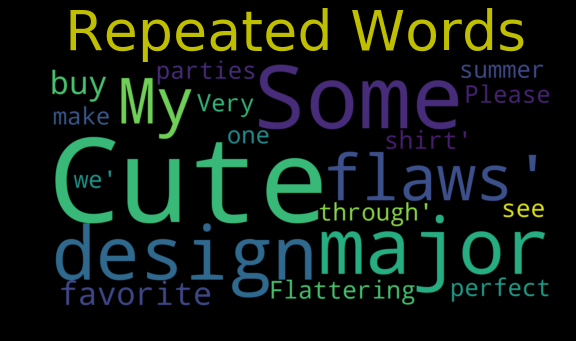

In [32]:
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class_Name"][df["Class_Name"].notnull()].unique())]
                + ["dress", "petite"])


cloud(text= df.Title[df.Title.notnull()].astype(str).values,
      title="Repeated Words",
      stopwords= new_stop,
      size = (7,4))

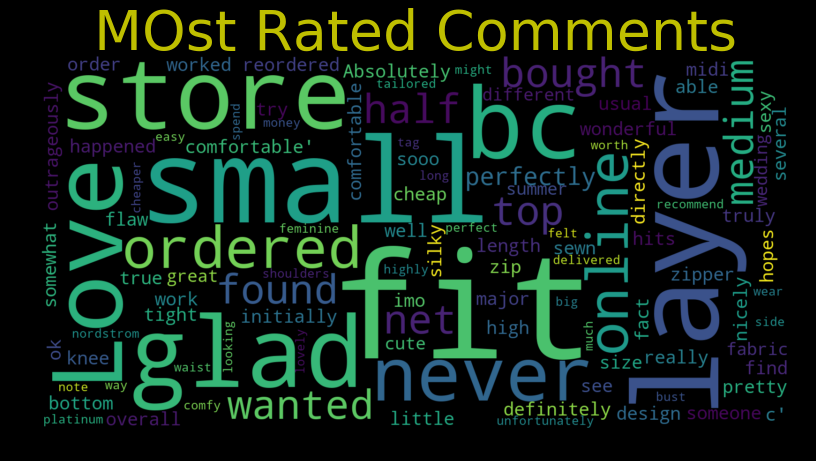

In [33]:
title ="MOst Rated Comments"
temp = df['Review_Text'][df.Rating.astype(int) >= 3]


new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class_Name"][df["Class_Name"].notnull()].unique())]
                + ["dress", "petite"])

cloud(text= temp.values, title=title,stopwords= new_stop)

 From the above we can say that mostly reviewed and rated comment words.

# Data Analysis

# Classifying the ratings as good or bad based on the given condition:
    rating <=3:Bad    

    otherwise:Good

In [34]:
df['Class']='Bad'
df.loc[df.Rating>3,['Class']]='Good'

In [35]:
def ret_rating(rating):
    if rating>3:
        return 'Good'
    else:
        return 'Bad'

In [36]:
df['Class']=df.apply(lambda x: ret_rating(x['Rating']),axis=1)

In [37]:
#Unique and Top
#Division names,Department Names,Class names 
df[[ "Division_Name","Department_Name","Class_Name"]].describe(include=["O"]).drop("count")

,Division_Name,Department_Name,Class_Name
unique,3,6,20
top,General,Tops,Dresses
freq,13365,10048,6145


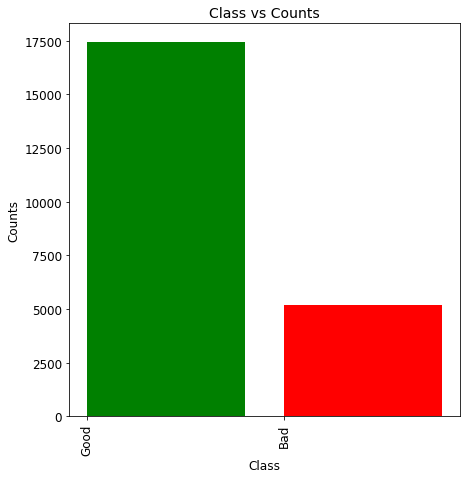

In [38]:
#Good Reviews Vs Bad Riews
rev1 = df.groupby(['Class'])['Class'].agg({'counts':'count'})
rev1 = rev1.sort_values(['counts'],ascending=False)
plot.rcParams["figure.figsize"] = (7,7)
y_pos = np.arange(len(rev1.index))
counts = rev1['counts'].tolist()
plot.bar(y_pos, counts, align= 'edge', alpha = 1.0, color=[ 'green', 'red', 'pink', 'blue', 'green'])
plot.xlabel('Class')
plot.ylabel('Counts')
plot.xticks(y_pos, rev1.index,rotation = 90 , fontsize = 12)
plot.title('Class vs Counts', fontsize = 14)
plot.show()

From above plotted data we can see that data is imbalanced,we have more Good reviews when compared to Bad reviews

In [39]:
df["Rating"].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [40]:
df['Division_Name'].value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: Division_Name, dtype: int64

In [41]:
df['Class_Name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: Class_Name, dtype: int64

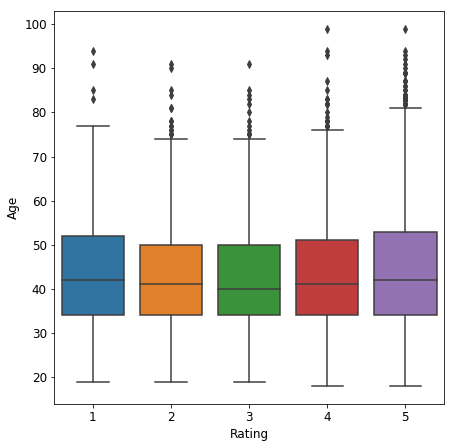

In [42]:
#Age Vs Rating
se.boxplot(x='Rating',y='Age',data=df)

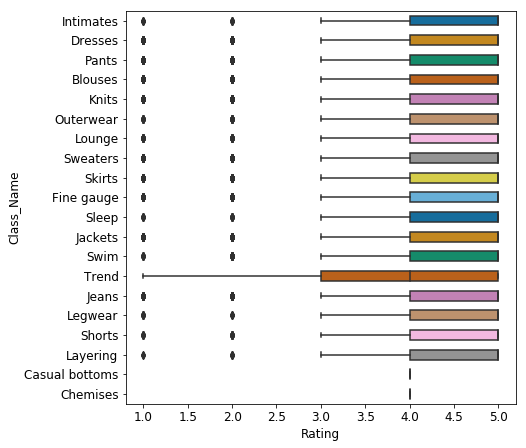

In [43]:
# Class Name  Vs Rating
se.boxplot( y='Class_Name' ,x='Rating', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

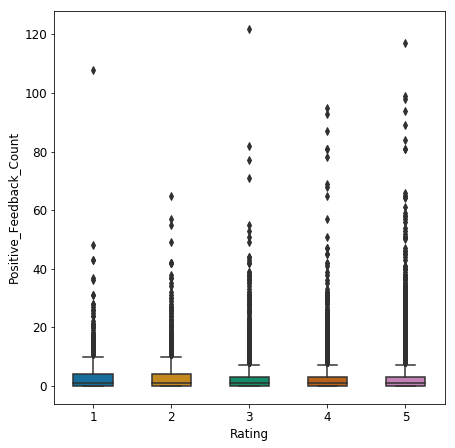

In [44]:
#Positive feedback count Vs Rating
bplot = se.boxplot( y='Positive_Feedback_Count' ,x='Rating', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

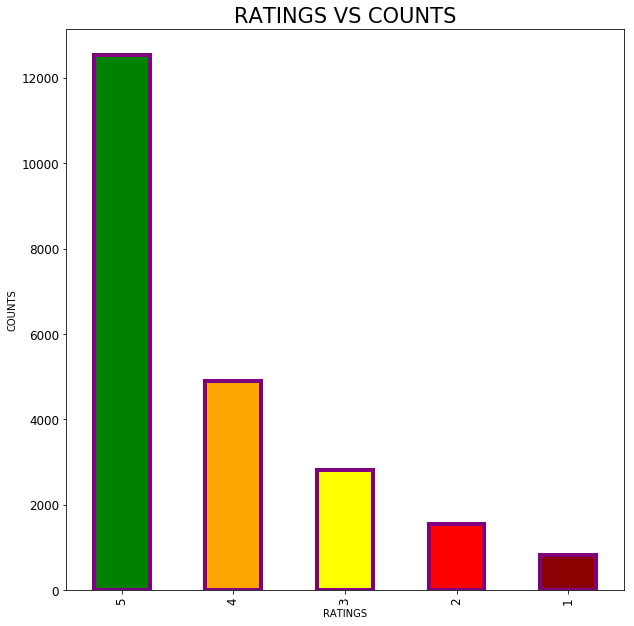

In [45]:
#rating vs count
plot.rcParams["figure.figsize"]= (10,10)
df.Rating.value_counts()[:20].plot(kind='bar', color= ['green','orange','yellow','red','darkred'], alpha =1, linewidth=4, edgecolor= 'purple')

plot.ylabel('COUNTS', fontsize=10)
plot.xlabel('RATINGS', fontsize=10)
plot.title('RATINGS VS COUNTS', fontsize=21)
plot.show()

In [46]:
df[df.Class== 'Good'].groupby(['Clothing_ID']).Clothing_ID.agg({'count'}).reset_index().sort_values(by= 'count', ascending= False)[:10]

,Clothing_ID,count
932,1078,761
729,862,603
948,1094,565
935,1081,452
739,872,434
697,829,394
964,1110,368
759,895,304
735,868,281
798,936,275


In [47]:
df[df.Class== 'Bad'].groupby(['Clothing_ID']).Clothing_ID.agg({'count'}).reset_index().sort_values(by= 'count', ascending= False)[:10]

,Clothing_ID,count
501,1078,226
318,862,175
517,1094,170
324,868,133
291,829,118
504,1081,109
532,1110,103
518,1095,88
328,872,85
323,867,83


The above data shows that good an bad rating to a respected IDs

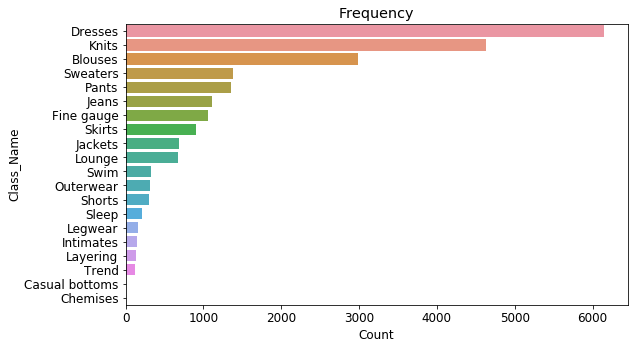

In [48]:
#Plot representing the frequency counts of different items present in the dataframe
plot.subplots(figsize=(9,5))
se.countplot(y="Class_Name", data=df,order=df["Class_Name"].value_counts().index)
plot.title("Frequency")
plot.xlabel("Count")
plot.show()

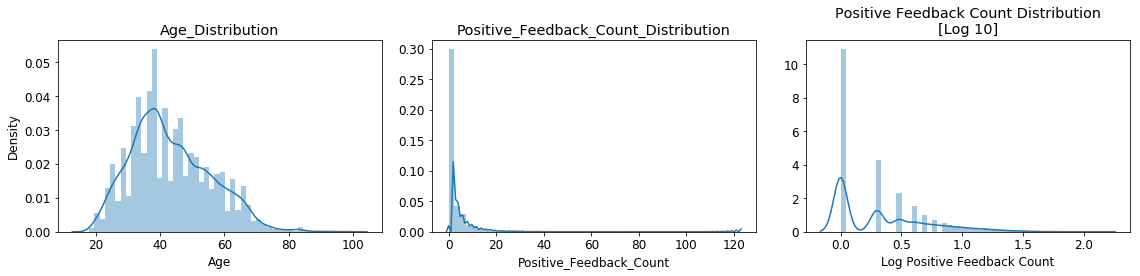

In [49]:
#density vs Age distribution
#density vs Positiv feedback Count
#density vs Positiv feedback Count
f, ax = plot.subplots(1, 3, figsize=(16, 4), sharey=False)
se.distplot(df.Age, ax=ax[0])
ax[0].set_title('Age_Distribution')
ax[0].set_ylabel('Density')
se.distplot(df['Positive_Feedback_Count'], ax=ax[1])
ax[1].set_title('Positive_Feedback_Count_Distribution')
se.distplot(np.log10((df['Positive_Feedback_Count'][df['Positive_Feedback_Count'].notnull()] + 1)), ax=ax[2])
ax[2].set_title('Positive Feedback Count Distribution\n[Log 10]')
ax[2].set_xlabel('Log Positive Feedback Count')
plot.rcParams.update({'font.size': 12})
plot.tight_layout()
plot.savefig('age-and-positive-feedback-freqdist.png', format='png', dpi=600)
plot.show()

In [50]:
df[(df.Class=='Bad') & (df.Recommended_IND==1)][['Class', 'Recommended_IND']].count()

Class              1279
Recommended_IND    1279
dtype: int64

In [51]:
Rec_List= pd.DataFrame(columns=['Class', 'Ind1_Count', 'Ind0_Count'])
Rc_list=[]
for i in list([[1,0,'Good'],[1,0,'Bad']]):
    Rc_list.append([i[2],df[(df.Class==i[2]) & (df.Recommended_IND== int(i[0]))]['Class'].count(),df[(df.Class==i[2]) & (df.Recommended_IND==int(i[1]))]['Class'].count()])
Rec_List= Rec_List.append(pd.DataFrame(Rc_list,columns=['Class','Ind1_Count','Ind0_Count']), ignore_index= True)

In [52]:
Rec_List

,Class,Ind1_Count,Ind0_Count
0,Good,17248,187
1,Bad,1279,3914


In [53]:
#most reviewed items
df.groupby(['Clothing_ID'])['Clothing_ID'].agg({'counts' : 'count'}).reset_index().sort_values(by='counts',ascending=False)

,Clothing_ID,counts
1046,1078,987
831,862,778
1062,1094,735
1049,1081,561
841,872,519
799,829,512
1078,1110,471
837,868,414
864,895,384
905,936,348


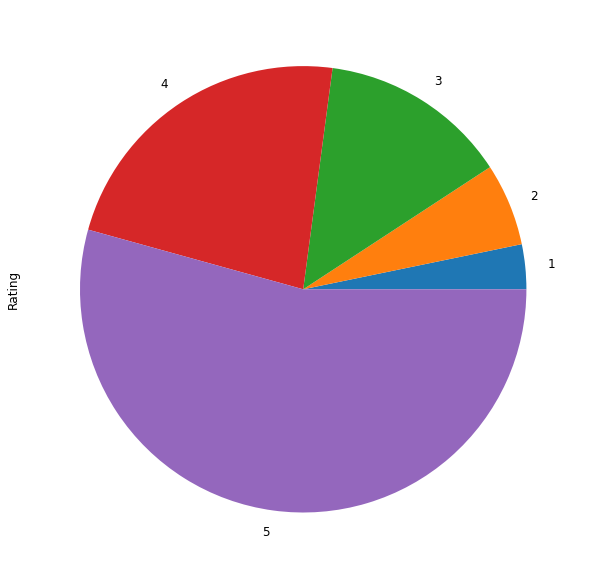

In [54]:
#its an example we can try with various clothing id in the above data
df[df.Clothing_ID==1078].groupby(['Rating'])['Rating'].count().plot(kind='pie')

In [55]:
#Create wedges and corresponding labels for column in dataframe.
def NameCount (df_in, column):
    #Store unique entries 
    names = df_in[column].unique()
    #remove nans
    names = [x for x in names if str(x) != 'nan']
    #Create array to store values
    count = np.empty(len(names))
    #Store recurrence of each value
    for i in range(len(names)):
        count[i] = df[(df[column] == names[i])].shape[0]
    return names, count

In [56]:
#Division
div_name, div_count = NameCount(df, 'Division_Name')
#Department 
dep_name, dep_count = NameCount(df, 'Department_Name')
#Class 
class_name, class_count = NameCount(df, 'Class_Name')

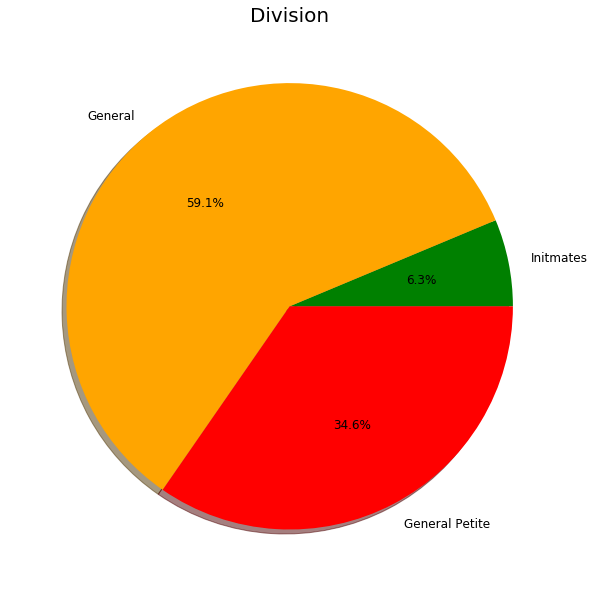

In [57]:
plot.pie(div_count, labels=div_name, autopct='%1.1f%%', shadow=True, radius= 1, colors={'green','orange','red'})
plot.title("Division", fontsize = 20)
plot.show()

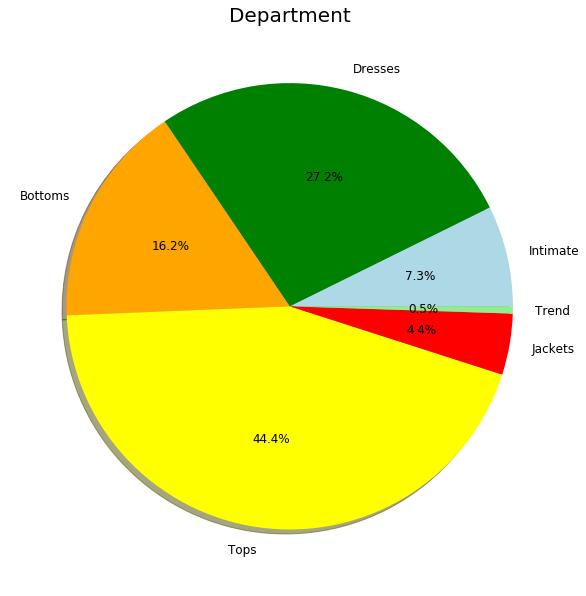

In [58]:
plot.pie(dep_count, labels=dep_name, autopct='%1.1f%%', shadow=True, radius= 1, colors={'green','orange','yellow','red','lightgreen','lightblue'})
plot.title("Department", fontsize = 20)
plot.show()

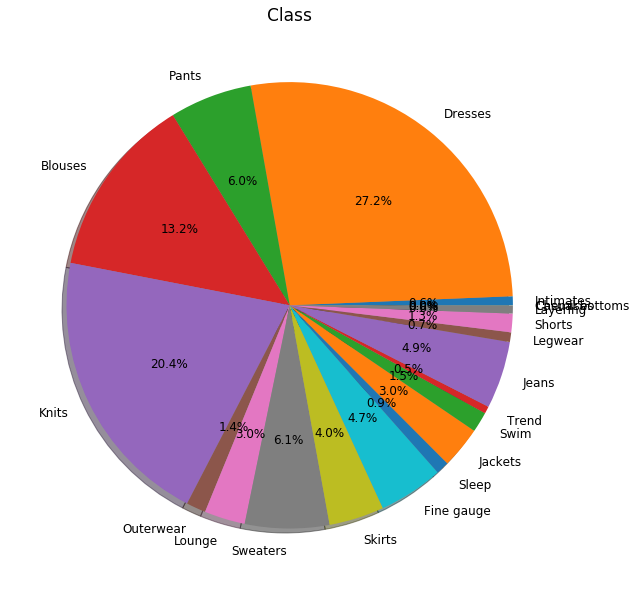

In [59]:
plot.pie(class_count, labels=class_name, autopct='%1.1f%%', shadow=True, radius= 1)
plot.title("Class", loc = 'center', fontsize = 17)
plot.show()

The above pie graphs shows that the ratio of data to the respected fields

In [60]:
#highest number of good and bad reviews
df[df.Class=='Good'].groupby(['Clothing_ID'])['Clothing_ID'].agg({'counts' : 'count'}).reset_index().sort_values(by='counts',ascending=False)

,Clothing_ID,counts
932,1078,761
729,862,603
948,1094,565
935,1081,452
739,872,434
697,829,394
964,1110,368
759,895,304
735,868,281
798,936,275


In [61]:
df[df.Class=='Bad'].groupby(['Clothing_ID'])['Clothing_ID'].agg({'counts' : 'count'}).reset_index().sort_values(by='counts',ascending=False)

,Clothing_ID,counts
501,1078,226
318,862,175
517,1094,170
324,868,133
291,829,118
504,1081,109
532,1110,103
518,1095,88
328,872,85
323,867,83


In [62]:
df[df.Age<90]['Age'].agg({'min','max'})

min    18
max    89
Name: Age, dtype: int64

In [63]:
df[df.Age>40].head(3)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Class
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good


In [64]:
#Age buckets
bins = np.arange(0,100,10)
df['Age_group'] = pd.cut(df['Age'], bins)
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Class,Age_group
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good,"(30, 40]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good,"(30, 40]"
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad,"(50, 60]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good,"(40, 50]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good,"(40, 50]"


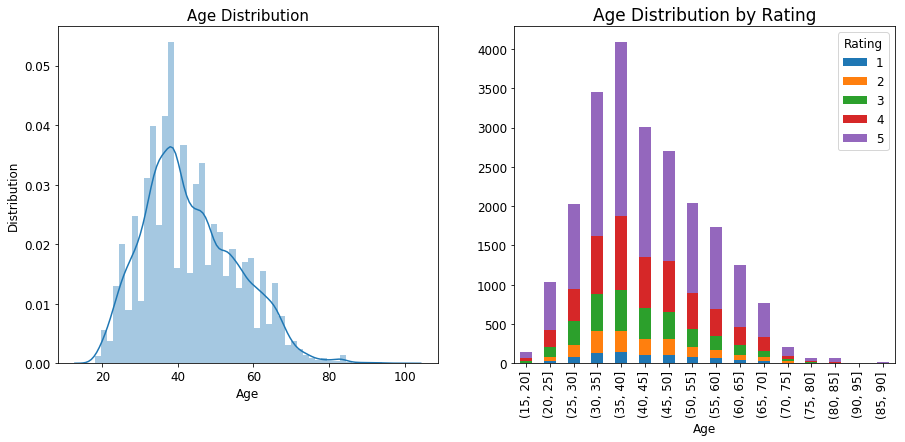

In [65]:
#AGE VS DISTRIBUTION
f,ax=plot.subplots(ncols=2,nrows=1,figsize=(15,6))
se.distplot(df.Age,ax=ax[0])
ax[0].set_title('Age Distribution',fontsize=15)
ax[0].set_ylabel('Distribution')
df.groupby(['Rating',pd.cut(df['Age'],np.arange(0,100,5))])\
        .size()\
       .unstack(0)\
       .plot.bar(stacked=True,ax=ax[1])
#AGE DISRIBUTION VS RATING
ax[1].set_title('Age Distribution by Rating',fontsize=17)
plot.show()

In [66]:
#correlation between input variables
cor=df.corr(method='pearson')
print(cor)

                         Clothing_ID       Age    Rating  Recommended_IND  \
Clothing_ID                 1.000000  0.016961 -0.017196        -0.014074   
Age                         0.016961  1.000000  0.030121         0.034312   
Rating                     -0.017196  0.030121  1.000000         0.792543   
Recommended_IND            -0.014074  0.034312  0.792543         1.000000   
Positive_Feedback_Count     0.044413  0.040807 -0.060845        -0.065833   

                         Positive_Feedback_Count  
Clothing_ID                             0.044413  
Age                                     0.040807  
Rating                                 -0.060845  
Recommended_IND                        -0.065833  
Positive_Feedback_Count                 1.000000  


In [67]:
#skew between input values
skew=df.skew()
print(skew)

Clothing_ID               -2.091714
Age                        0.515636
Rating                    -1.287245
Recommended_IND           -1.655112
Positive_Feedback_Count    6.379189
dtype: float64


In [68]:
#kurtosis between input values
kurtosis=df.kurtosis()
print(kurtosis)

Clothing_ID                 5.248074
Age                        -0.130414
Rating                      0.722245
Recommended_IND             0.739460
Positive_Feedback_Count    69.629134
dtype: float64


In [69]:
#median of datA
df.median(axis = 1, skipna = True)

0         4.0
1         5.0
2         3.0
3         5.0
4         6.0
5         4.0
6         5.0
7         4.0
8         5.0
9         5.0
10       14.0
11        5.0
12        5.0
13        5.0
14        3.0
15        4.0
16        3.0
17        5.0
18        5.0
19        5.0
20        4.0
21       14.0
22        7.0
23        3.0
24        5.0
25        3.0
26        2.0
27        4.0
28        5.0
29        4.0
         ... 
23454     4.0
23455     4.0
23456     5.0
23457     5.0
23458     5.0
23459     4.0
23460     3.0
23461     4.0
23462     3.0
23463     4.0
23464     5.0
23465     5.0
23466     4.0
23467    23.0
23468     5.0
23469     4.0
23471     4.0
23472     5.0
23473     5.0
23474     5.0
23475     3.0
23476     4.0
23477     5.0
23478     1.0
23479     5.0
23481     5.0
23482     3.0
23483     3.0
23484     3.0
23485    22.0
Length: 22628, dtype: float64

In [70]:
df.mean(axis = 1, skipna = True) 

0        161.0
1        224.8
2        228.0
3        221.0
4        181.2
5        227.0
6        180.8
7        181.2
8        221.4
9        223.4
10       229.4
11       228.4
12       231.2
13       163.4
14       226.4
15       224.0
16       221.0
17       180.0
18       231.6
19       226.0
20       177.4
21       230.8
22       223.4
23       223.0
24       181.6
25       146.2
26       196.8
27       207.8
28       149.0
29         7.6
         ...  
23454    208.8
23455    229.0
23456    229.6
23457     64.0
23458    186.2
23459    231.8
23460    223.0
23461     63.4
23462    205.4
23463     66.6
23464    231.0
23465    225.0
23466    228.6
23467    238.6
23468    153.0
23469     63.4
23471     59.6
23472    178.6
23473    228.0
23474    228.4
23475    229.8
23476    110.8
23477    228.6
23478    227.4
23479    210.6
23481    228.8
23482    182.8
23483    227.8
23484    223.6
23485    236.8
Length: 22628, dtype: float64

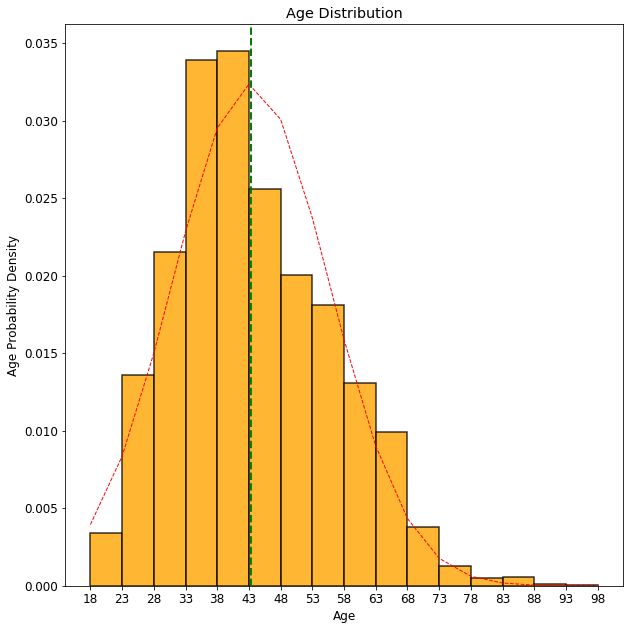

In [71]:
import scipy.stats as scs
from scipy.stats import norm
df= pd.DataFrame(df)
#Create bin to store ages
age_bin= np.arange(18, 100, 5)
#Average age
age_avg = np.average(df['Age'])
#age standard devation
age_std = np.std(df['Age'])

#Create histogram
plot.hist(df['Age'], bins = age_bin, alpha = 0.8, edgecolor='black', linewidth =1.5, color ='orange', density= 1)

#Add a fit
y = norm.pdf( age_bin, age_avg, age_std)
l = plot.plot(age_bin, y, 'r--', linewidth=1)

#Set x axis ticks to match bins
plot.xticks(age_bin)

#Add labels and title
plot.xlabel("Age")
plot.ylabel("Age Probability Density")
plot.title("Age Distribution")

#Add average line
plot.axvline(age_avg, color='green', linestyle = 'dashed', linewidth= 2)

#Use grey background
plot.style.use('bmh')

#Display histogram
plot.show()

In [72]:
#text preprocessing and data testing and traning
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
wordnet_Lemmatizer = WordNetLemmatizer()

stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

def cleanhtml(sentence):
    cleanr= re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ', cleaned)
    return cleaned

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [73]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path

In [74]:
#Try on the first review
word_cloud_0 = WordCloud(background_color="white", max_font_size= 100).generate(review_text[0])

In [75]:
#Combine all the reviews into one massive string
review_text_combined = " ".join(review for review in review_text)
print ("There are {} words in the combination of all reviews.".format(len(review_text_combined)))

There are 7009283 words in the combination of all reviews.


In [76]:
# Create stopword list:
from nltk.corpus import stopwords
stopwords = set('stopwords')
#For now let's only remove the
stopwords.update(["the"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white", 
                      width= 400, height = 200, 
                      max_words=50).generate(review_text_combined)

# Sentiment Analysis

In [77]:
#Define a list of positive expressions
pos_word = ['love', 'good', 'great', 'amazing', 'super', 'smooth', 'fits', 'nice', 'perfect', 'cute', 'recommend',
           'like']

In [78]:
#Define a list of negative words
neg_word = ['hate', 'bad', 'horrible', 'big', 'small', 'rough', 'ugly', 'itch', 'expensive', 'scratch', 'never',
           'dislike', 'ill', 'poor', 'smelly']

In [79]:
#Create a list that will record sentiment.
# Add one if positive and substract one if negative.
sentiments = np.zeros(len(review_text))

In [80]:
#Start by adding scores

for j in range(len(pos_word)):
#Iterate over every positive word
    for i in range (len(review_text)):
    #Divide the string into a list of words in case one positive word is used more than once
        sep_words = re.sub("[^\w]", " ", str(review_text[i])).split()
        #Compare word for word if the sentiment is good
        for k in range(len(sep_words)):
            if pos_word[j] == sep_words[k]:
                sentiments[i] += 1

In [81]:
#Check the overall sentiment after positives
np.mean(sentiments)

1.7752784161216193

In [82]:
#Store the review score in array
review_score = np.array(df_index['Rating'])

In [83]:
len(review_score)

22628

In [84]:
len(sentiments)

22628

In [85]:
#Create review bin
rate_1 = []
rate_2 = []
rate_3 = []
rate_4 = []
rate_5 = []

In [86]:
feel_score = 0

for i in range (len(review_text)):
    #Divide the string into a list of words in case one positive word is used more than once
    sep_words = re.sub("[^\w]", " ", str(review_text[i])).split()
    #Compare word for word if the sentiment is good
    for k in range(len(sep_words)):
        for j in range(len(neg_word)):
            if neg_word[j] == sep_words[k]:
                feel_score -= 1
        for m in range(len(pos_word)):
            if pos_word[m] == sep_words[k]:
                feel_score += 1
    #Normalize the feel score over the length of the review
    feel_score = feel_score/len(sep_words)
    if review_score[i] == 1:
        rate_1.append(feel_score)
    elif review_score[i] == 2:
        rate_2.append(feel_score)
    elif review_score[i] == 3:
        rate_3.append(feel_score)
    elif review_score[i] == 4:
        rate_4.append(feel_score)
    elif review_score[i] == 5:
        rate_5.append(feel_score)
    #reset feel score for next iteration
    feel_score = 0

In [87]:
#Store sentimetns in array
feels_tick = np.array([rate_1, rate_2, rate_3, rate_4, rate_5])

In [88]:
feels_mean = []
for i in range(len(feels_tick)):
    feels_mean.append(np.mean(feels_tick[i]))

In [89]:
feels_mean

[0.012846657211981288,
 0.014502126680206324,
 0.016790097117915407,
 0.02682085053805027,
 0.03820055760794544]

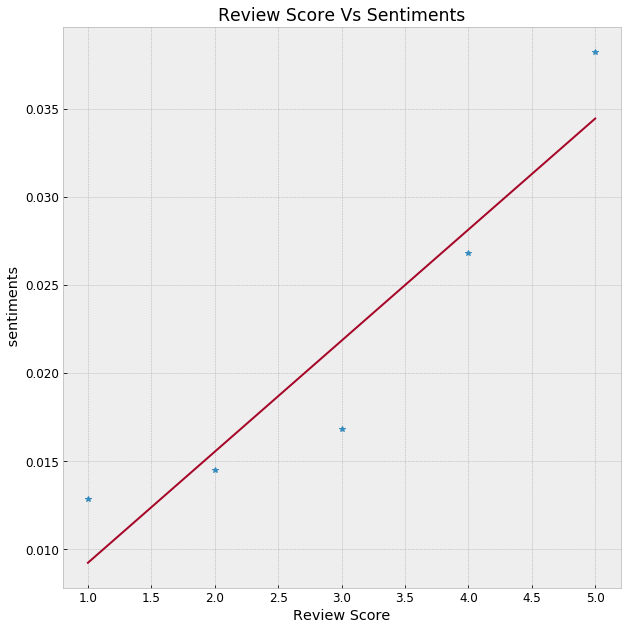

In [90]:
from numpy.polynomial.polynomial import polyfit
rating_bin = np.arange(1, 6, 1)
#fit the data
b, m = polyfit(x = rating_bin, y = feels_mean, deg= 1)

#Draw a scatter plot
plot.plot(rating_bin, feels_mean, '*')
#draw the fit
plot.plot(rating_bin, b + m * rating_bin, '-')

#Add labels and title
plot.xlabel("Review Score")
plot.ylabel(" sentiments")
plot.title("Review Score Vs Sentiments")
plot.show()


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(review_text,department, test_size= 0.2, random_state= 42)

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect= CountVectorizer()

In [93]:
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(18102, 12874)

In [94]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer= TfidfTransformer()

In [95]:
X_train_tfidf= tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(18102, 12874)

In [96]:
#Repeat process for testing data
#Use transform instead of fit_transform because training dataset fixes the vocabulary

#Tokenize test set
X_test_counts = count_vect.transform(X_test)
#Normalize test set
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(4526, 12874)

# NAIVE BAYES

In [97]:
#Import MNB
from sklearn.naive_bayes import MultinomialNB
#Create classifier
clf_nb = MultinomialNB()
#Fit to training data
clf_nb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
#Predict using Naive Bayes
nb_predict = clf_nb.predict(X_test_tfidf)

In [99]:
#Get the score
np.mean(nb_predict == y_test)

0.6243923994697305

# SGD CLASSIFIER

In [100]:
#Import
from sklearn.linear_model import SGDClassifier

In [101]:
#Create the classifer
clf_sgd= SGDClassifier(loss= 'hinge', penalty='l2', alpha= 1e-4, max_iter= 5, learning_rate='optimal')
#Fit to training data
clf_sgd.fit(X_train_tfidf, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
#Predict using SVM
sgd_predict = clf_sgd.predict(X_test_tfidf)

In [103]:
#Get the score
np.mean(sgd_predict == y_test)

0.8389306230667256

# GRID SEARCH NAIVE BAYES

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
# Get list of NB params
clf_nb.get_params(deep=True)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [106]:
# Use default parameters on scikit documentation
clf_nb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [107]:
# Set up parameters
# This will affect time to fit data
parameters_nb = {'alpha' : np.arange(0.1, 1, 0.1),
                'fit_prior': np.full((9,), True),
                'class_prior': np.full((9,), None)}

In [108]:
# Create Classifier
clf_nb_grid = GridSearchCV(clf_nb, parameters_nb)

In [109]:
#Fit the data
clf_nb_grid.fit(X_train_tfidf, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'fit_prior': array([ True,  True,  True,  True,  True,  True,  True,  True,  True]), 'class_prior': array([None, None, None, None, None, None, None, None, None], dtype=object)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
# Predict using GridSearch and NB
nb_grid_predict = clf_nb_grid.predict(X_test_tfidf)

In [111]:
# Get the score
np.mean(nb_grid_predict == y_test)

0.7277949624392399

#  THANK YOU